### First Machine Learning Homework 
### Student Name: Omnia Elmenshawy
### Student ID: 2000007 
#### Note: I changed the datapath variable as I downloaded the dataset on my computer and worked on it from there.

**Module 1 Starter Kit**

PyCharm Shortcuts & Tips:
- Ctrl+Enter: Run cell
- Shft+Enter: Run cell and select below
- Alt+Enter: Show intention actions
- Ctrl+P: Show parameter information
- Shft+F6: Rename…
- Ctrl+Alt+L: Reformat code 
- Ctrl+/: Comment with line comment 
- Ctrl+Alt+O: Optimize imports 
- Ctrl+Alt+I: Auto-indent lines 


In [145]:
#imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model



In [146]:
# This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


In [147]:
# to fetch the files in datasets/lifesat folder
import os
datapath = r"/Users/omniaelmenshawy/Desktop/datasets/lifeseat"

In [148]:
# Make this notebook's output stable across runs:
np.random.seed(42)


In [149]:
# Load the data
oecd_bli = pd.read_csv(datapath + "//oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "//gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")


In [150]:
# inspect OECD's life satisfaction data csv file
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [151]:
oecd_bli.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null   float64
 15  Flag

In [152]:
# inspect OECD's country-life satisfaction pairs  
oecd_bli[["Country","Value"]].head()


,Country,Value
0,Australia,1.1
1,Austria,1.0
2,Belgium,2.0
3,Canada,0.2
4,Czech Republic,0.9


In [153]:
# inspect IMF's GDP per capita data csv file
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [154]:
gdp_per_capita.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        190 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    float64
 6   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


In [155]:
# inspect OECD's country-life satisfaction pairs  
gdp_per_capita[["Country", "2015"]].head()


,Country,2015
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


In [156]:
# merge the data and prepare for training
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [157]:
country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP per capita     29 non-null     float64
 1   Life satisfaction  29 non-null     float64
dtypes: float64(2)
memory usage: 696.0+ bytes


In [158]:
# inspect sample data
country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP per capita     29 non-null     float64
 1   Life satisfaction  29 non-null     float64
dtypes: float64(2)
memory usage: 696.0+ bytes


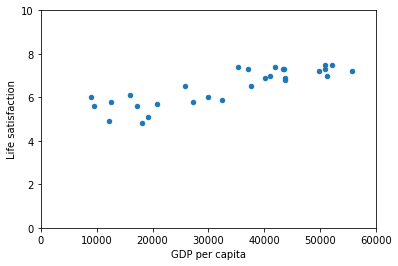

Venezuela GDP/person: 7744.746
Turkey GDP/person: 9437.372
Poland GDP/person: 12495.334


In [159]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
plt.show()

venezuela_gdp_per_capita = gdp_per_capita.loc["Venezuela"]["GDP per capita"]
print('Venezuela GDP/person:',venezuela_gdp_per_capita)

turkey_gdp_per_capita = gdp_per_capita.loc["Turkey"]["GDP per capita"]
print('Turkey GDP/person:', turkey_gdp_per_capita)

poland_gdp_per_capita = gdp_per_capita.loc["Poland"]["GDP per capita"]
print('Poland GDP/person:', poland_gdp_per_capita)

**TODO 1: Predict Venezuela life satisfaction value by a model based learning (Linear Regression, LinearRegression) method**

* In the scatter plot you get, show Venezuela in a different color.* 
* Print the LifeSatisfaction value you obtaine.*
* Plot the LinearRegression function that fits the data.* 


In [160]:
# Finding the gdp of Venezuela

ven_gdp_per_capita = gdp_per_capita.loc["Venezuela"]["GDP per capita"]
print("Venezuela's gdp per captia is: ", ven_gdp_per_capita)

Venezuela's gdp per captia is:  7744.746


In [161]:
ven_gdp_per_capita

7744.746

In [162]:
# Performing the Linear regression model: 

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)
ven_predicted_life_satisfaction = model.predict([[ven_gdp_per_capita]])[0][0]
print("Venezuela's predicted life satisfaction is: ", ven_predicted_life_satisfaction)

Venezuela's predicted life satisfaction is:  5.233439453373504


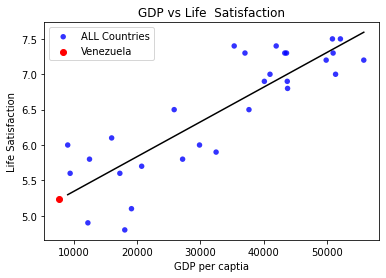

In [163]:
# Visualization

fig = plt.figure()
ax = fig.add_subplot()

plt.title('GDP vs Life  Satisfaction')
plt.ylabel("Life Satisfaction")
plt.xlabel("GDP per captia")
ax.scatter(x = X, y = y, alpha = 0.8, c="blue", edgecolors = "none", s = 30, label= "ALL Countries")
ax.scatter(ven_gdp_per_capita, ven_predicted_life_satisfaction, c = "red", label = "Venezuela")
a, b = np.polyfit(X[:, 0], y, 1)
ax.plot(X[:,0], a*X[:,0]+ b, c = "black")
plt.legend()
plt.show()


**TODO 2: Predict Venezuela life satisfaction value by using a K-Nearest Neighbour Regression (KNeighborsRegressor, KNN) instance based learning method**
* In the scatter plot you get, show Venezuela in a different color.* 
* Print the LifeSatisfaction value you obtaine.*

*Observe what happens when you increase the "K" parameter in KNN, show and discuss your results on a notebook.* 



### Observation: 

- When the KNN n_neighbors changes, the results differs.
- When the n_neighbors = 3, the prediction of venezeuela (as well as all other countrys points )gets more closer to the linear line, which means a better prediction and a smaller error than the other values of parameters.

In [164]:
#KNN model with n_neghbors = 2

from sklearn.neighbors import KNeighborsRegressor
model  = KNeighborsRegressor(n_neighbors=2).fit(X, y)
ven_predicted_life_satisfaction = model.predict([[ven_gdp_per_capita]])[0][0]
print("Venezuela's predicted life satisfaction is: ", ven_predicted_life_satisfaction)

Venezuela's predicted life satisfaction is:  5.8


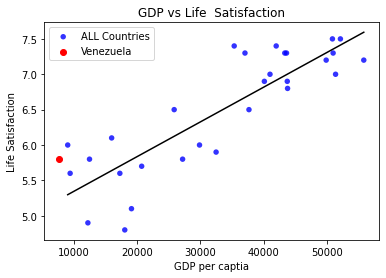

In [165]:
fig = plt.figure()
ax = fig.add_subplot()

plt.title('GDP vs Life  Satisfaction')
plt.ylabel("Life Satisfaction")
plt.xlabel("GDP per captia")
ax.scatter(x = X, y = y, alpha = 0.8, c="blue", edgecolors = "none", s = 30, label= "ALL Countries")
ax.scatter(ven_gdp_per_capita, ven_predicted_life_satisfaction, c = "red", label = "Venezuela")
a, b = np.polyfit(X[:, 0], y, 1)
ax.plot(X[:,0], a*X[:,0]+ b, c = "black")
plt.legend()
plt.show()

In [166]:
#KNN model with n_neghbors = 3

from sklearn.neighbors import KNeighborsRegressor
model  = KNeighborsRegressor(n_neighbors=3).fit(X, y)
ven_predicted_life_satisfaction = model.predict([[ven_gdp_per_capita]])[0][0]
print("Venezuela's predicted life satisfaction is: ", ven_predicted_life_satisfaction)

Venezuela's predicted life satisfaction is:  5.5


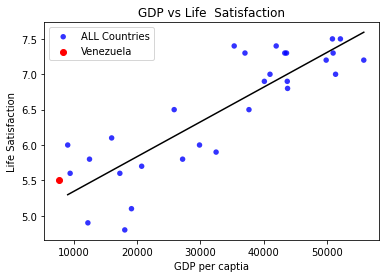

In [167]:
fig = plt.figure()
ax = fig.add_subplot()

plt.title('GDP vs Life  Satisfaction')
plt.ylabel("Life Satisfaction")
plt.xlabel("GDP per captia")
ax.scatter(x = X, y = y, alpha = 0.8, c="blue", edgecolors = "none", s = 30, label= "ALL Countries")
ax.scatter(ven_gdp_per_capita, ven_predicted_life_satisfaction, c = "red", label = "Venezuela")
a, b = np.polyfit(X[:, 0], y, 1)
ax.plot(X[:,0], a*X[:,0]+ b, c = "black")
plt.legend()
plt.show()

In [168]:
#KNN model with n_neghbors = 5

from sklearn.neighbors import KNeighborsRegressor
model  = KNeighborsRegressor(n_neighbors=5).fit(X, y)
ven_predicted_life_satisfaction = model.predict([[ven_gdp_per_capita]])[0][0]
print("Venezuela's predicted life satisfaction is: ", ven_predicted_life_satisfaction)

Venezuela's predicted life satisfaction is:  5.68


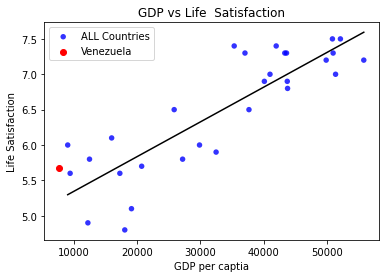

In [169]:
fig = plt.figure()
ax = fig.add_subplot()

plt.title('GDP vs Life  Satisfaction')
plt.ylabel("Life Satisfaction")
plt.xlabel("GDP per captia")
ax.scatter(x = X, y = y, alpha = 0.8, c="blue", edgecolors = "none", s = 30, label= "ALL Countries")
ax.scatter(ven_gdp_per_capita, ven_predicted_life_satisfaction, c = "red", label = "Venezuela")
a, b = np.polyfit(X[:, 0], y, 1)
ax.plot(X[:,0], a*X[:,0]+ b, c = "black")
plt.legend()
plt.show()

**TODO 3: Predict Venezuela life satisfaction value by using Polynomial Regression Fitting.** 
* In the scatter plot you get, show Venezuela in a different color.* 
* Print the LifeSatisfaction value you obtaine.*
* Plot the polynomial function that fits the data.* 

*Observe what happens when you increase the "Degree" parameter in polynomial regression, show and discuss your results on a notebook.*




### Observation: 

- When the Polynomial degree parameter changes, the results differs.
- When the degree = 1, the prediction of venezeuela (as well as all other countrys points ) gets away from the linear line negativly with the same distance when the degree is equal to 3 and 4 , how ever it is positivy effected with higher degrees.

In [170]:
#Polynomial with degree 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
ven_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(ven_poly, y)
ven_predicted_life_satisfaction = np.round(model.predict(ven_poly))[0][0]

print("Venezuela's predicted life satisfaction is: ", ven_predicted_life_satisfaction)

Venezuela's predicted life satisfaction is:  5.0


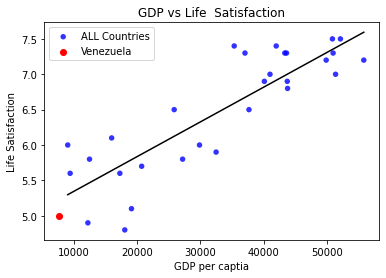

In [171]:
fig = plt.figure()
ax = fig.add_subplot()

plt.title('GDP vs Life  Satisfaction')
plt.ylabel("Life Satisfaction")
plt.xlabel("GDP per captia")
ax.scatter(x = X, y = y, alpha = 0.8, c="blue", edgecolors = "none", s = 30, label= "ALL Countries")
ax.scatter(ven_gdp_per_capita, ven_predicted_life_satisfaction, c = "red", label = "Venezuela")
a, b = np.polyfit(X[:, 0], y, 1)
ax.plot(X[:,0], a*X[:,0]+ b, c = "black")
plt.legend()
plt.show()

In [172]:
#Polynomial with degree 3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
ven_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(ven_poly, y)
ven_predicted_life_satisfaction = np.round(model.predict(ven_poly))[0][0]

print("Venezuela's predicted life satisfaction is: ", ven_predicted_life_satisfaction)

Venezuela's predicted life satisfaction is:  6.0


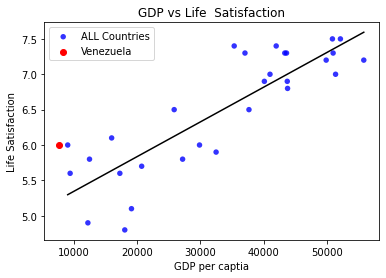

In [173]:
fig = plt.figure()
ax = fig.add_subplot()

plt.title('GDP vs Life  Satisfaction')
plt.ylabel("Life Satisfaction")
plt.xlabel("GDP per captia")
ax.scatter(x = X, y = y, alpha = 0.8, c="blue", edgecolors = "none", s = 30, label= "ALL Countries")
ax.scatter(ven_gdp_per_capita, ven_predicted_life_satisfaction, c = "red", label = "Venezuela")
a, b = np.polyfit(X[:, 0], y, 1)
ax.plot(X[:,0], a*X[:,0]+ b, c = "black")
plt.legend()
plt.show()

In [174]:
#Polynomial with degree 4
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
ven_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(ven_poly, y)
ven_predicted_life_satisfaction = np.round(model.predict(ven_poly))[0][0]

print("Venezuela's predicted life satisfaction is: ", ven_predicted_life_satisfaction)

Venezuela's predicted life satisfaction is:  6.0


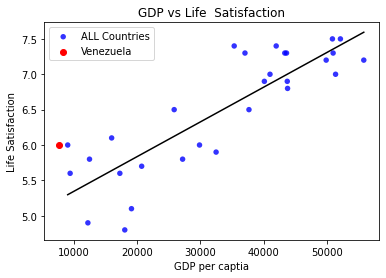

In [175]:
fig = plt.figure()
ax = fig.add_subplot()

plt.title('GDP vs Life  Satisfaction')
plt.ylabel("Life Satisfaction")
plt.xlabel("GDP per captia")
ax.scatter(x = X, y = y, alpha = 0.8, c="blue", edgecolors = "none", s = 30, label= "ALL Countries")
ax.scatter(ven_gdp_per_capita, ven_predicted_life_satisfaction, c = "red", label = "Venezuela")
a, b = np.polyfit(X[:, 0], y, 1)
ax.plot(X[:,0], a*X[:,0]+ b, c = "black")
plt.legend()
plt.show()